# Car Price Prediction

In [37]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,r2_score
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
sns.set_style('whitegrid')
import os
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [38]:
data = pd.read_csv('bmw_pricing_challenge.csv')

In [39]:
data.head(10)

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01
5,BMW,335,152352,225,2011-05-01,petrol,black,convertible,True,True,False,False,True,True,True,True,17100,2018-02-01
6,BMW,325,205219,145,2009-05-01,diesel,grey,convertible,True,True,False,False,True,True,True,True,12400,2018-02-01
7,BMW,118,115560,105,2009-08-01,petrol,white,convertible,True,True,False,False,False,True,True,False,6100,2018-02-01
8,BMW,Z4,123886,125,2004-07-01,petrol,black,convertible,True,False,False,False,False,True,True,False,6200,2018-03-01
9,BMW,320,139541,135,2013-06-01,diesel,white,convertible,False,False,False,False,True,False,True,False,17300,2018-03-01


In [40]:
data.shape

(4843, 18)

In [41]:
data.isnull().sum()

maker_key            0
model_key            0
mileage              0
engine_power         0
registration_date    0
fuel                 0
paint_color          0
car_type             0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
price                0
sold_at              0
dtype: int64

In [42]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mileage,4843.0,140962.799504,60196.740703,-64.0,102913.5,141080.0,175195.5,1000376.0
engine_power,4843.0,128.988230,38.993360,0.0,100.0,120.0,135.0,423.0
price,4843.0,15828.081767,9220.285684,100.0,10800.0,14200.0,18600.0,178500.0


In [43]:
data.dtypes

maker_key            object
model_key            object
mileage               int64
engine_power          int64
registration_date    object
fuel                 object
paint_color          object
car_type             object
feature_1              bool
feature_2              bool
feature_3              bool
feature_4              bool
feature_5              bool
feature_6              bool
feature_7              bool
feature_8              bool
price                 int64
sold_at              object
dtype: object

In [44]:
data['registration_date']=pd.to_datetime(data['registration_date'])
data['sold_at']=pd.to_datetime(data['sold_at'])

In [45]:
data[data['mileage']<0]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
2938,BMW,640 Gran Coupé,-64,230,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,2018-04-01


In [46]:
data.at[2938, 'mileage'] = 64

In [47]:
data[data['mileage']==64]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
2938,BMW,640 Gran Coupé,64,230,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,2018-04-01


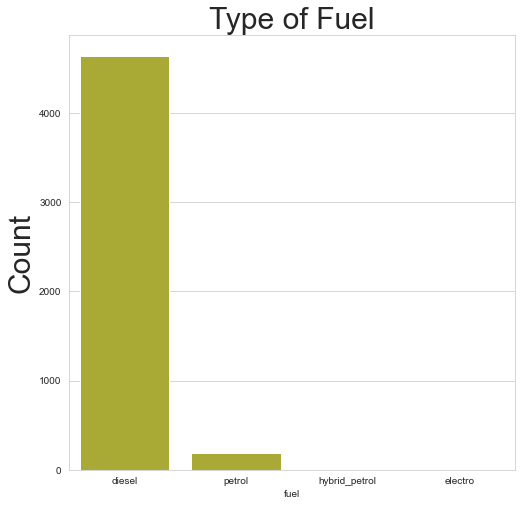

In [48]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='fuel',color=base_color)
plt.title('Type of Fuel',fontsize=30)
plt.ylabel('Count',fontsize=30)

locs, labels = plt.xticks()


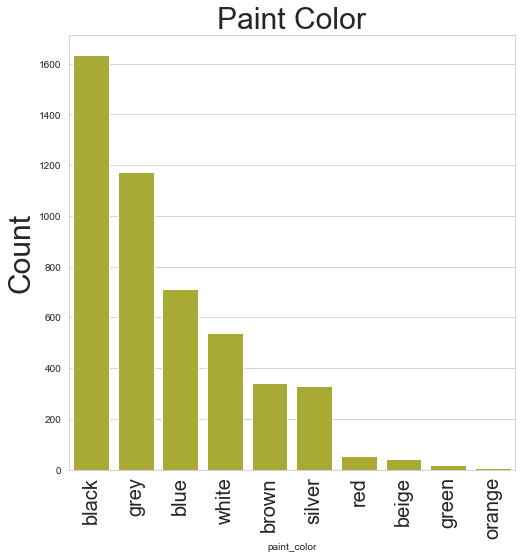

In [49]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='paint_color',color=base_color,order=data.paint_color.value_counts().index)
plt.title('Paint Color',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90,fontsize=20)

locs, labels = plt.xticks()

## Satılan BMW'nin nihai fiyatının belirlenmesinde rengin çok büyük bir etken olmadığını görüyoruz. Aşağıdaki grafikteki ilk altı arsa, neredeyse aynı çeyrek aralıklarını göstermektedir. Bu yüzden bir sinir ağı modeli uydururken özelliği veri kümesinden çıkaracağım

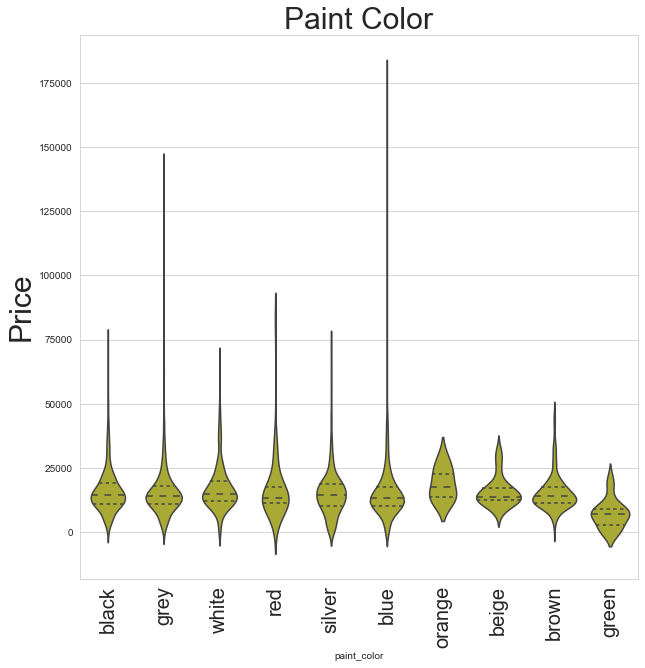

In [50]:
#Let see how the color is related to price in the resale market . THe data is has more points for black , grey and blue

plt.figure(figsize=(10,10));
sns.violinplot(data=data,x='paint_color',y='price',inner='quartile',color=base_color);
plt.ylabel('Price',fontsize=30);
plt.title("Paint Color",fontsize=30);
plt.xticks(rotation=90,fontsize=20);

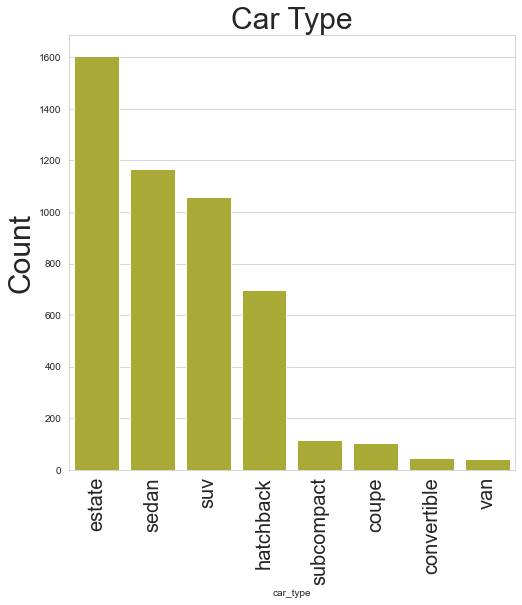

In [51]:
plt.figure(figsize=(8,8))
base_color=sns.color_palette()[8]
sns.countplot(data=data, x='car_type',color=base_color,order=data.car_type.value_counts().index)
plt.title('Car Type',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xticks(rotation=90,fontsize=20)

locs, labels = plt.xticks()

## SUV ve coupe'nin diğer tiplere göre daha yüksek medyan fiyat gösterdiğini görüyoruz.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'estate'),
  Text(1, 0, 'sedan'),
  Text(2, 0, 'suv'),
  Text(3, 0, 'hatchback'),
  Text(4, 0, 'subcompact'),
  Text(5, 0, 'coupe'),
  Text(6, 0, 'convertible'),
  Text(7, 0, 'van')])

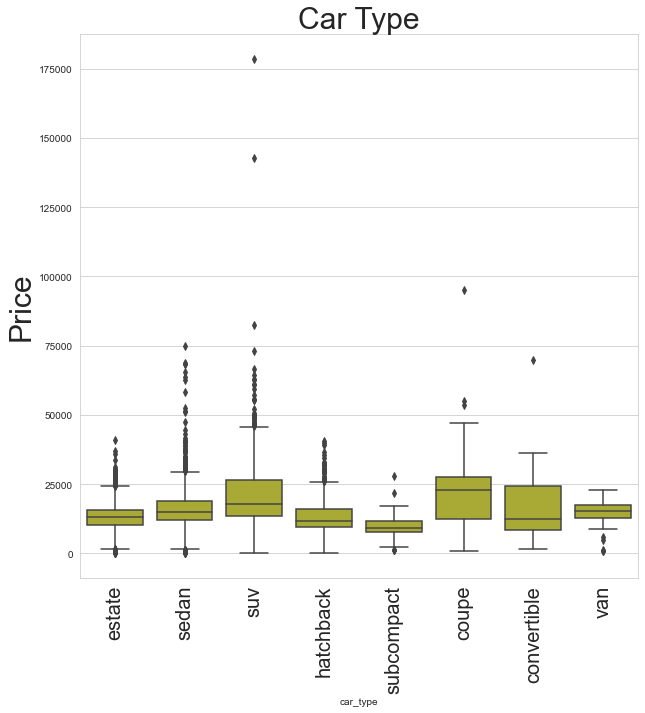

In [52]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data,x='car_type',y='price',color=base_color,order=data.car_type.value_counts().index);
plt.title('Car Type',fontsize=30)
plt.ylabel('Price',fontsize=30)
plt.xticks(fontsize=20,rotation=90)

## Datafame'e vechile_days adlı başka bir sütun ekleyeceğim, bu, registration_date ve sold_at sütunları arasındaki gün farkıdır.

In [53]:
data['registration_year']=data['registration_date'].dt.year

## Yıllara göre araçların sayıları

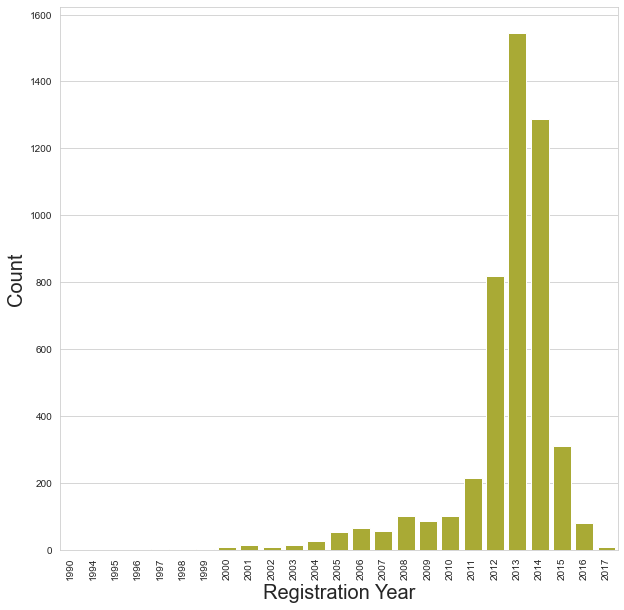

In [54]:
plt.figure(figsize=(10,10));
sns.countplot(data=data,x='registration_year',color=base_color);
plt.xticks(rotation=90);
plt.xlabel('Registration Year',fontsize=20);
plt.ylabel('Count',fontsize=20);

## Fiyatın yıllara göre nasıl değiştiğini görelim.Ayrıca bu grafikte hangi yılda hangi araba türlerinin nereye getirildiğini de görebiliriz.

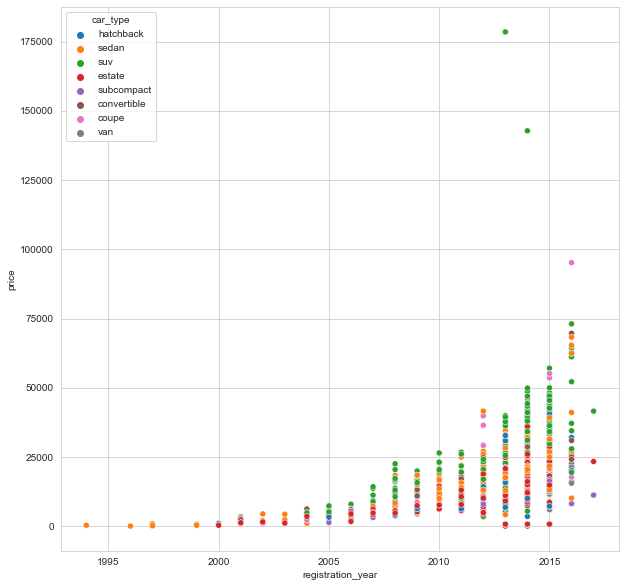

In [55]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data.sample(2000),x='registration_year',y='price',hue='car_type');

In [56]:
data.dtypes

maker_key                    object
model_key                    object
mileage                       int64
engine_power                  int64
registration_date    datetime64[ns]
fuel                         object
paint_color                  object
car_type                     object
feature_1                      bool
feature_2                      bool
feature_3                      bool
feature_4                      bool
feature_5                      bool
feature_6                      bool
feature_7                      bool
feature_8                      bool
price                         int64
sold_at              datetime64[ns]
registration_year             int64
dtype: object

## Araçların kaç günlük ve kaç yıllık olduğunu buluyoruz.

In [57]:
 data['vechile_days']=data['sold_at']-data['registration_date']
data['year_diff']=data['sold_at'].dt.year-data['registration_year']

## En çok satılan arabaların (320,318,X3,318) gibi 3 seri ve ardından 5 seri olduğunu görüyoruz.

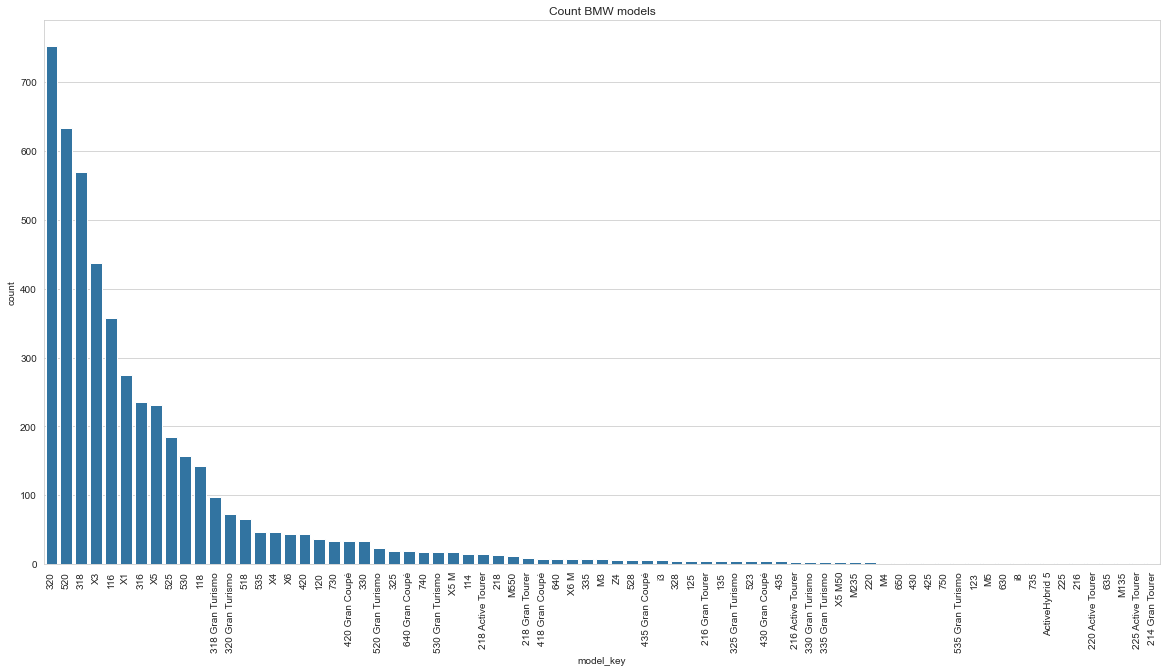

In [58]:
plt.figure(figsize=(20,10))
color=sns.color_palette()[0]
sns.countplot(data=data,x='model_key',color=color,order=data.model_key.value_counts().index);
plt.xticks(rotation=90);
plt.title('Count BMW models');

## Çoğu araba 100 ila 150 HP arasındadır

Text(0, 0.5, 'Number of Engines')

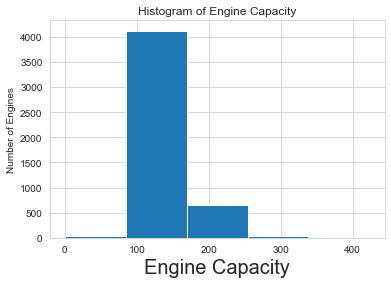

In [59]:
plt.hist(data=data,x='engine_power',bins=5);
plt.xlabel('Engine Capacity',fontsize=20);
plt.title('Histogram of Engine Capacity');
plt.ylabel('Number of Engines')

## Kilometre ve fiyat ilişkisini görelim

## Burada daha anlamlı bir grafik elde etmek için verileri ifade eden 1500 örnekli bir alt küme ile çıkarım yaptım.

## Buradan da benzer kilometre için, SUV'nin daha yüksek fiyat ve hatchback'lerin en düşük fiyatlar arasında olduğunu görüyoruz.

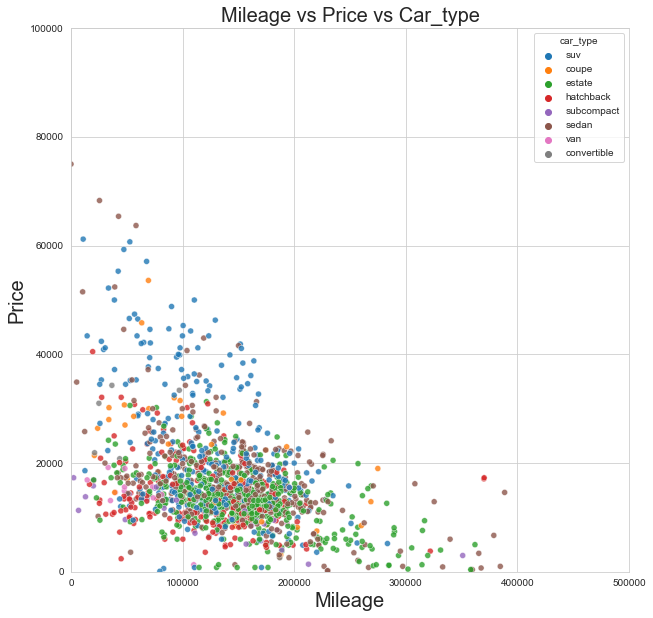

In [60]:
plt.figure(figsize=(10,10));
sns.scatterplot(data=data.sample(1500),x='mileage',y='price',alpha=0.8,hue='car_type');
plt.xlim(0,500000)
plt.ylim(0,100000)
plt.xlabel('Mileage',fontsize=20);
plt.ylabel('Price',fontsize=20);
plt.title('Mileage vs Price vs Car_type',fontsize=20);

## Beklendiği gibi, daha yeni arabaların kilometresi düşüktür ve dolayısıyla fiyatları daha yüksektir. Ayrıca plt.xlim i kaldırdığımızda 500.000 kilometre ve 100.000 fiyat aralığının üzerinde çok az model olduğunu görüyoruz, bu yüzden o araçları aykırı olduğu için ve çok az olduğu için çıkarıyorum.

C:\Users\Mustafa\AppData\Local\Temp\ipykernel_8904\812186407.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


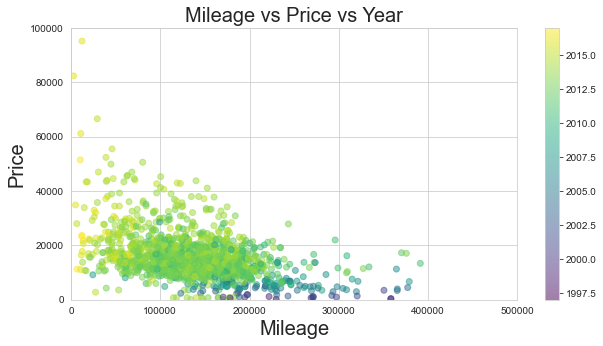

In [61]:
plt.figure(figsize=(10,5))
plt.scatter(data = data.sample(1500), x = 'mileage', y = 'price', c = 'registration_year',cmap='viridis',alpha=0.5)
plt.colorbar();
plt.xlim(0,500000)
plt.ylim(0,100000)
plt.xlabel('Mileage',fontsize=20);
plt.ylabel('Price',fontsize=20);
plt.title('Mileage vs Price vs Year',fontsize=20);

## Fiyat değişkeninin özellikle motor gücü ile iyi bir korelasyona sahip olduğunu görüyoruz.

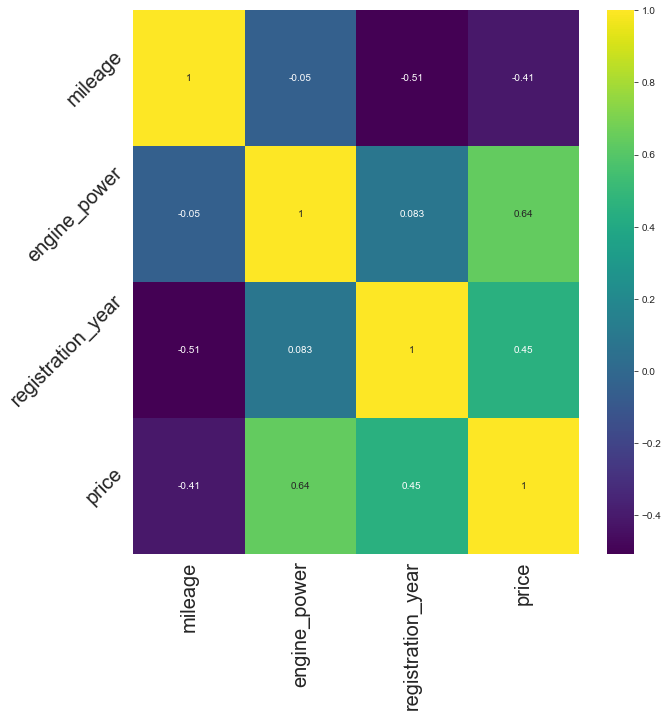

In [63]:
plt.figure(figsize=(10,10))
var=['mileage','engine_power','registration_year','price']
sns.heatmap(data[var].corr(),annot=True,cmap='viridis');
plt.xticks(fontsize=20,rotation=90);
plt.yticks(fontsize=20,rotation=45);

# Model 1

In [25]:
data[data["price"]<10000]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,registration_year,vechile_days,year_diff
7,BMW,118,115560,105,2009-08-01,petrol,white,convertible,True,True,...,False,False,True,True,False,6100,2018-02-01,2009,3106 days,9
8,BMW,Z4,123886,125,2004-07-01,petrol,black,convertible,True,False,...,False,False,True,True,False,6200,2018-03-01,2004,4991 days,14
15,BMW,120,208945,130,2008-04-01,diesel,grey,convertible,True,True,...,False,True,False,True,True,8300,2018-04-01,2008,3652 days,10
17,BMW,650,24521,270,2008-01-01,petrol,grey,convertible,True,False,...,False,False,False,True,False,9200,2018-09-01,2008,3896 days,10
19,BMW,Z4,128940,110,2008-03-01,petrol,black,convertible,True,False,...,False,False,False,True,False,7700,2018-05-01,2008,3713 days,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,BMW,216,31079,85,2015-11-01,diesel,black,van,False,True,...,False,False,False,False,False,4800,2018-03-01,2015,851 days,3
4806,BMW,218,118323,110,2014-09-01,diesel,white,van,False,False,...,False,False,False,False,False,800,2018-02-01,2014,1249 days,4
4810,BMW,216 Active Tourer,193657,85,2015-03-01,diesel,silver,van,False,False,...,False,False,False,True,False,8900,2018-09-01,2015,1280 days,3
4812,BMW,218,120849,110,2015-06-01,diesel,blue,van,False,False,...,False,False,False,False,True,6000,2018-04-01,2015,1035 days,3


In [26]:
data[data["mileage"]<4000]

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,...,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at,registration_year,vechile_days,year_diff
471,BMW,318,3142,100,2016-09-01,diesel,blue,estate,True,True,...,False,False,False,True,False,21400,2018-02-01,2016,518 days,2
781,BMW,318,3478,100,2016-09-01,diesel,blue,estate,True,True,...,False,False,False,True,False,21400,2018-03-01,2016,546 days,2
2409,BMW,420 Gran Coupé,476,120,2014-05-01,diesel,blue,hatchback,True,True,...,False,False,True,True,True,30300,2018-08-01,2014,1553 days,4
2938,BMW,640 Gran Coupé,64,230,2017-03-01,diesel,black,sedan,True,True,...,True,False,False,True,True,75000,2018-04-01,2017,396 days,1
3687,BMW,116,2399,85,2016-11-01,diesel,white,subcompact,False,False,...,False,False,False,True,False,17300,2018-03-01,2016,485 days,2
3935,BMW,X5,706,155,2017-07-01,diesel,black,suv,True,True,...,True,True,True,True,True,41600,2018-02-01,2017,215 days,1
4146,BMW,X6 M,2970,423,2016-04-01,petrol,red,suv,True,True,...,False,False,False,True,True,82400,2018-04-01,2016,730 days,2
4372,BMW,X5,612,183,2016-10-01,diesel,black,suv,True,True,...,False,False,False,True,True,49100,2018-06-01,2016,608 days,2


In [27]:
data=data[data.price<100000] 
data=data[data.mileage<400000] 

features=data[['mileage','engine_power','paint_color','car_type','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','price','vechile_days']]

features=pd.get_dummies(features,drop_first=True)


features['vechile_days']=features['vechile_days'].values.astype('int')
features['feature_1']=features['feature_1'].astype('int')
features['feature_2']=features['feature_2'].astype('int')
features['feature_3']=features['feature_3'].astype('int')
features['feature_4']=features['feature_4'].astype('int')
features['feature_5']=features['feature_5'].astype('int')
features['feature_6']=features['feature_6'].astype('int')
features['feature_7']=features['feature_7'].astype('int')
features['feature_8']=features['feature_8'].astype('int')

columns_names=features.columns

sc = StandardScaler()
features = sc.fit_transform(features[columns_names])

features_scales=pd.DataFrame(features,columns=columns_names)


X=features_scales.drop(['price'],axis=1).values
y=features_scales['price'].values.reshape(len(X),1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [1]:
X

NameError: name 'X' is not defined

In [28]:
print(X.shape,y.shape)

(4835, 27) (4835, 1)


In [ ]:
model1 = Sequential()

model1.add(Dense(units = 24, kernel_initializer = 'he_normal', activation = 'relu', input_dim = X.shape[1]))
model1.add(Dense(units = 12, kernel_initializer = 'he_normal', activation = 'relu'))
model1.add(Dense(units = 1, kernel_initializer = 'he_normal', activation = 'linear'))

sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(optimizer =sgd, loss = 'mean_squared_error',metrics=['MAE'])

history = model1.fit(X_train, y_train,validation_data=(X_test,y_test) , batch_size = 128, epochs = 350,verbose=2)

C:\Users\Mustafa\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/350
27/27 - 1s - loss: 1.3641 - MAE: 0.8424 - val_loss: 0.8865 - val_MAE: 0.6935 - 721ms/epoch - 27ms/step
Epoch 2/350
27/27 - 0s - loss: 0.7808 - MAE: 0.6432 - val_loss: 0.6988 - val_MAE: 0.6002 - 65ms/epoch - 2ms/step
Epoch 3/350
27/27 - 0s - loss: 0.6505 - MAE: 0.5837 - val_loss: 0.6096 - val_MAE: 0.5589 - 59ms/epoch - 2ms/step
Epoch 4/350
27/27 - 0s - loss: 0.5729 - MAE: 0.5452 - val_loss: 0.5550 - val_MAE: 0.5327 - 54ms/epoch - 2ms/step
Epoch 5/350
27/27 - 0s - loss: 0.5228 - MAE: 0.5227 - val_loss: 0.5138 - val_MAE: 0.5125 - 53ms/epoch - 2ms/step
Epoch 6/350
27/27 - 0s - loss: 0.4853 - MAE: 0.5013 - val_loss: 0.4857 - val_MAE: 0.4986 - 48ms/epoch - 2ms/step
Epoch 7/350
27/27 - 0s - loss: 0.4582 - MAE: 0.4874 - val_loss: 0.4644 - val_MAE: 0.4883 - 67ms/epoch - 2ms/step
Epoch 8/350
27/27 - 0s - loss: 0.4371 - MAE: 0.4768 - val_loss: 0.4475 - val_MAE: 0.4801 - 62ms/epoch - 2ms/step
Epoch 9/350
27/27 - 0s - loss: 0.4214 - MAE: 0.4682 - val_loss: 0.4360 - val_MAE: 0.4730 - 58m

In [30]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                672       
                                                                 
 dense_1 (Dense)             (None, 12)                300       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 985
Trainable params: 985
Non-trainable params: 0
_________________________________________________________________


In [93]:
predictions=model1.predict(X_test)
print('Explained_varianve_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

MAE = mean_absolute_error(y_test,predictions)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

MSE = mean_squared_error(y_test,predictions)
print(f'Mean Squared Error (MSE): {np.round(MSE, 2)}')

46/46 [==============================] - 0s 1ms/step
Explained_varianve_score=0.7162696880658105
R-squared=0.7161485077236684
Mean Absolute Error (MAE): 0.37
Mean Squared Error (MSE): 0.29


In [32]:
history.history

{'loss': [1.3640952110290527,
  0.7807835936546326,
  0.6505404114723206,
  0.5728808045387268,
  0.5228385925292969,
  0.48532843589782715,
  0.45824146270751953,
  0.43711137771606445,
  0.42137762904167175,
  0.40849027037620544,
  0.39767253398895264,
  0.38913723826408386,
  0.38133639097213745,
  0.37376850843429565,
  0.36762338876724243,
  0.36159852147102356,
  0.3561592102050781,
  0.3514813482761383,
  0.34688347578048706,
  0.3444875478744507,
  0.3394964039325714,
  0.3359459638595581,
  0.3323076367378235,
  0.3293967545032501,
  0.32598090171813965,
  0.32320016622543335,
  0.3207767903804779,
  0.3173750340938568,
  0.3151037395000458,
  0.31259244680404663,
  0.31046974658966064,
  0.3084874749183655,
  0.30637598037719727,
  0.30447912216186523,
  0.303125262260437,
  0.3012863099575043,
  0.2983013987541199,
  0.29627764225006104,
  0.29462096095085144,
  0.2931157350540161,
  0.2905435264110565,
  0.2887336015701294,
  0.2867106795310974,
  0.28525882959365845,
  0.

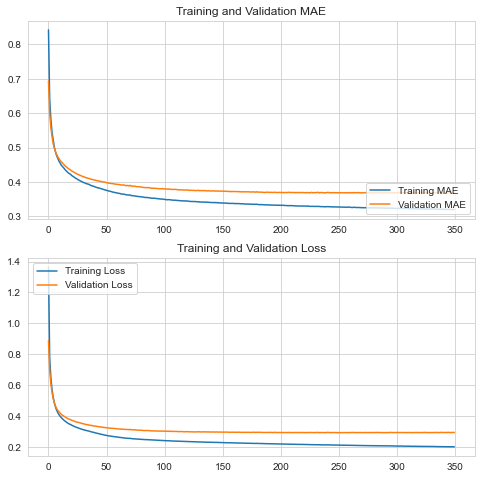

In [33]:
def plot_learning_curves():
    MAE = history.history["MAE"]
    val_MAE = history.history["val_MAE"]

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(range(350), MAE, label='Training MAE')
    plt.plot(range(350), val_MAE, label='Validation MAE')
    plt.legend(loc='lower right')
    plt.title('Training and Validation MAE')

    plt.subplot(2, 1, 2)
    plt.plot(range(350), loss, label='Training Loss')
    plt.plot(range(350), val_loss, label='Validation Loss')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Loss')
    plt.show()

plot_learning_curves()

# Model 2

In [37]:
model2 = Sequential()

model2.add(Dense(units = 82, activation = 'relu', input_dim = X.shape[1]))

model2.add(Dense(units = 55, activation = 'relu'))

model2.add(Dense(units = 28, activation = 'relu'))

model2.add(Dense(units = 1, activation = 'linear'))

adam = tf.optimizers.Adam(learning_rate=0.001, decay=1e-6)
model2.compile(optimizer ="adam", loss = 'mean_squared_error', metrics=['MeanSquaredError'])

history2 = model2.fit(X_train, y_train,validation_data=(X_test,y_test) , batch_size = 128, epochs = 350,verbose=2)

Epoch 1/350
27/27 - 1s - loss: 0.7377 - mean_squared_error: 0.7377 - val_loss: 0.4496 - val_mean_squared_error: 0.4496 - 562ms/epoch - 21ms/step
Epoch 2/350
27/27 - 0s - loss: 0.3349 - mean_squared_error: 0.3349 - val_loss: 0.3374 - val_mean_squared_error: 0.3374 - 71ms/epoch - 3ms/step
Epoch 3/350
27/27 - 0s - loss: 0.2669 - mean_squared_error: 0.2669 - val_loss: 0.3103 - val_mean_squared_error: 0.3103 - 63ms/epoch - 2ms/step
Epoch 4/350
27/27 - 0s - loss: 0.2443 - mean_squared_error: 0.2443 - val_loss: 0.2945 - val_mean_squared_error: 0.2945 - 66ms/epoch - 2ms/step
Epoch 5/350
27/27 - 0s - loss: 0.2277 - mean_squared_error: 0.2277 - val_loss: 0.2881 - val_mean_squared_error: 0.2881 - 67ms/epoch - 2ms/step
Epoch 6/350
27/27 - 0s - loss: 0.2161 - mean_squared_error: 0.2161 - val_loss: 0.2840 - val_mean_squared_error: 0.2840 - 66ms/epoch - 2ms/step
Epoch 7/350
27/27 - 0s - loss: 0.2055 - mean_squared_error: 0.2055 - val_loss: 0.2871 - val_mean_squared_error: 0.2871 - 68ms/epoch - 3ms/st

In [38]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 82)                2296      
                                                                 
 dense_4 (Dense)             (None, 55)                4565      
                                                                 
 dense_5 (Dense)             (None, 28)                1568      
                                                                 
 dense_6 (Dense)             (None, 1)                 29        
                                                                 
Total params: 8,458
Trainable params: 8,458
Non-trainable params: 0
_________________________________________________________________


In [94]:
predictions=model2.predict(X_test)
print('Explained_varianve_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

MAE = mean_absolute_error(y_test,predictions)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

MSE = mean_squared_error(y_test,predictions)
print(f'Mean Squared Error (MSE): {np.round(MSE, 2)}')

46/46 [==============================] - 0s 997us/step
Explained_varianve_score=0.5254100263343296
R-squared=0.5253594883972339
Mean Absolute Error (MAE): 0.47
Mean Squared Error (MSE): 0.49


In [40]:
history2.history

{'loss': [0.7376654744148254,
  0.3349497318267822,
  0.26689913868904114,
  0.24426284432411194,
  0.22765213251113892,
  0.2161262035369873,
  0.20550964772701263,
  0.1995469629764557,
  0.19195273518562317,
  0.18596485257148743,
  0.18269971013069153,
  0.17700393497943878,
  0.1725708246231079,
  0.16764962673187256,
  0.16426676511764526,
  0.16046540439128876,
  0.15580545365810394,
  0.1518101990222931,
  0.1472284197807312,
  0.14503565430641174,
  0.14060913026332855,
  0.13778285682201385,
  0.13607455790042877,
  0.13315534591674805,
  0.130010187625885,
  0.1269191950559616,
  0.124818354845047,
  0.12387509644031525,
  0.1206502914428711,
  0.11733189970254898,
  0.11643832921981812,
  0.11599595844745636,
  0.11568336933851242,
  0.11125880479812622,
  0.10886161029338837,
  0.10719349980354309,
  0.10686814785003662,
  0.10662375390529633,
  0.10118599981069565,
  0.09815293550491333,
  0.09709960222244263,
  0.09591992199420929,
  0.09605743736028671,
  0.093312278389

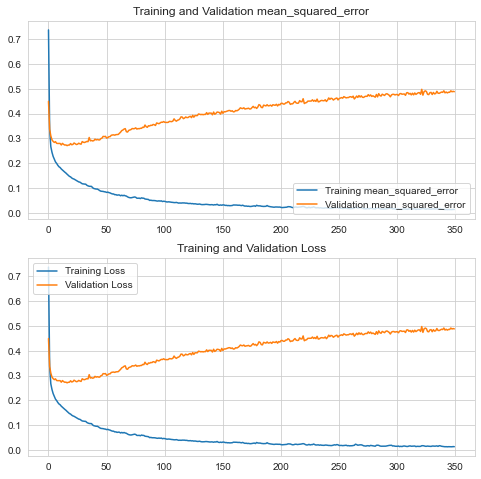

In [41]:
def plot_learning_curves():
    mean_squared_error = history2.history["mean_squared_error"]
    val_mean_squared_error = history2.history["val_mean_squared_error"]

    loss = history2.history['loss']
    val_loss = history2.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(range(350), mean_squared_error, label='Training mean_squared_error')
    plt.plot(range(350), val_mean_squared_error, label='Validation mean_squared_error')
    plt.legend(loc='lower right')
    plt.title('Training and Validation mean_squared_error')

    plt.subplot(2, 1, 2)
    plt.plot(range(350), loss, label='Training Loss')
    plt.plot(range(350), val_loss, label='Validation Loss')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Loss')
    plt.show()

plot_learning_curves()

# Model 2 Regularization

In [96]:
model2x = Sequential()

model2x.add(Dense(units = 82, activation = 'relu', input_dim = X.shape[1]))

model2x.add(Dense(units = 55, activation = 'relu'))

model2x.add(Dense(units = 28, activation = 'relu'))

model2x.add(Dense(units = 1, activation = 'linear'))

adam = tf.optimizers.Adam(learning_rate=0.01, decay=1e-6)
model2x.compile(optimizer ="adam", loss = 'mean_squared_error', metrics=['MeanSquaredError'])

history2x = model2x.fit(X_train, y_train,validation_data=(X_test,y_test) , batch_size = 128, epochs = 350,verbose=2)

Epoch 1/350
27/27 - 1s - loss: 0.6430 - mean_squared_error: 0.6430 - val_loss: 0.4594 - val_mean_squared_error: 0.4594 - 825ms/epoch - 31ms/step
Epoch 2/350
27/27 - 0s - loss: 0.3500 - mean_squared_error: 0.3500 - val_loss: 0.3482 - val_mean_squared_error: 0.3482 - 76ms/epoch - 3ms/step
Epoch 3/350
27/27 - 0s - loss: 0.2760 - mean_squared_error: 0.2760 - val_loss: 0.3118 - val_mean_squared_error: 0.3118 - 72ms/epoch - 3ms/step
Epoch 4/350
27/27 - 0s - loss: 0.2458 - mean_squared_error: 0.2458 - val_loss: 0.2984 - val_mean_squared_error: 0.2984 - 72ms/epoch - 3ms/step
Epoch 5/350
27/27 - 0s - loss: 0.2307 - mean_squared_error: 0.2307 - val_loss: 0.3050 - val_mean_squared_error: 0.3050 - 69ms/epoch - 3ms/step
Epoch 6/350
27/27 - 0s - loss: 0.2172 - mean_squared_error: 0.2172 - val_loss: 0.2877 - val_mean_squared_error: 0.2877 - 73ms/epoch - 3ms/step
Epoch 7/350
27/27 - 0s - loss: 0.2045 - mean_squared_error: 0.2045 - val_loss: 0.2832 - val_mean_squared_error: 0.2832 - 75ms/epoch - 3ms/st

In [97]:
model2x.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 82)                2296      
                                                                 
 dense_36 (Dense)            (None, 55)                4565      
                                                                 
 dense_37 (Dense)            (None, 28)                1568      
                                                                 
 dense_38 (Dense)            (None, 1)                 29        
                                                                 
Total params: 8,458
Trainable params: 8,458
Non-trainable params: 0
_________________________________________________________________


In [98]:
predictions=model2x.predict(X_test)
print('Explained_varianve_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

MAE = mean_absolute_error(y_test,predictions)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

MSE = mean_squared_error(y_test,predictions)
print(f'Mean Squared Error (MSE): {np.round(MSE, 2)}')

46/46 [==============================] - 0s 881us/step
Explained_varianve_score=0.585624595124524
R-squared=0.5850014026639567
Mean Absolute Error (MAE): 0.45
Mean Squared Error (MSE): 0.43


In [99]:
history2x.history

{'loss': [0.6430307626724243,
  0.34997180104255676,
  0.27601704001426697,
  0.2457907795906067,
  0.23066246509552002,
  0.21715416014194489,
  0.20447611808776855,
  0.1960807889699936,
  0.18856559693813324,
  0.1826607584953308,
  0.18090513348579407,
  0.17406025528907776,
  0.17103256285190582,
  0.16655120253562927,
  0.16570796072483063,
  0.1596643477678299,
  0.15413972735404968,
  0.15061303973197937,
  0.14837384223937988,
  0.14922888576984406,
  0.1425185650587082,
  0.13700218498706818,
  0.13356560468673706,
  0.13358855247497559,
  0.12903378903865814,
  0.12486163526773453,
  0.12244588136672974,
  0.1213856115937233,
  0.12050097435712814,
  0.11861112713813782,
  0.11708445847034454,
  0.11409465223550797,
  0.11181062459945679,
  0.11028705537319183,
  0.10809817910194397,
  0.10780241340398788,
  0.10562548786401749,
  0.10862361639738083,
  0.10127090662717819,
  0.10041747987270355,
  0.1006239652633667,
  0.0971316546201706,
  0.09937384724617004,
  0.09319467

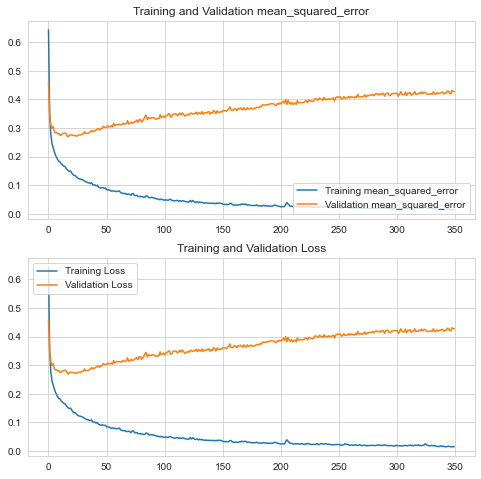

In [100]:
def plot_learning_curves():
    mean_squared_error = history2x.history["mean_squared_error"]
    val_mean_squared_error = history2x.history["val_mean_squared_error"]

    loss = history2x.history['loss']
    val_loss = history2x.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(range(350), mean_squared_error, label='Training mean_squared_error')
    plt.plot(range(350), val_mean_squared_error, label='Validation mean_squared_error')
    plt.legend(loc='lower right')
    plt.title('Training and Validation mean_squared_error')

    plt.subplot(2, 1, 2)
    plt.plot(range(350), loss, label='Training Loss')
    plt.plot(range(350), val_loss, label='Validation Loss')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Loss')
    plt.show()

plot_learning_curves()

# Model 3

In [42]:
model3 = Sequential()

model3.add(Dense(units = 82, activation = 'relu', input_dim = X.shape[1]))

model3.add(Dense(units = 55, activation = 'relu'))

model3.add(Dense(units = 28, activation = 'relu'))

model3.add(Dense(units = 1, activation = 'linear'))

sgd = tf.optimizers.SGD(learning_rate=0.001,nesterov = True)
model3.compile(optimizer =sgd, loss = 'mean_squared_error', metrics=['MeanSquaredError'])

history3 = model3.fit(X_train, y_train,validation_data=(X_test,y_test) , batch_size = 128, epochs = 350,verbose=2)

Epoch 1/350
27/27 - 0s - loss: 1.0317 - mean_squared_error: 1.0317 - val_loss: 1.0372 - val_mean_squared_error: 1.0372 - 497ms/epoch - 18ms/step
Epoch 2/350
27/27 - 0s - loss: 1.0060 - mean_squared_error: 1.0060 - val_loss: 1.0157 - val_mean_squared_error: 1.0157 - 75ms/epoch - 3ms/step
Epoch 3/350
27/27 - 0s - loss: 0.9839 - mean_squared_error: 0.9839 - val_loss: 0.9965 - val_mean_squared_error: 0.9965 - 58ms/epoch - 2ms/step
Epoch 4/350
27/27 - 0s - loss: 0.9639 - mean_squared_error: 0.9639 - val_loss: 0.9778 - val_mean_squared_error: 0.9778 - 64ms/epoch - 2ms/step
Epoch 5/350
27/27 - 0s - loss: 0.9444 - mean_squared_error: 0.9444 - val_loss: 0.9597 - val_mean_squared_error: 0.9597 - 65ms/epoch - 2ms/step
Epoch 6/350
27/27 - 0s - loss: 0.9257 - mean_squared_error: 0.9257 - val_loss: 0.9421 - val_mean_squared_error: 0.9421 - 64ms/epoch - 2ms/step
Epoch 7/350
27/27 - 0s - loss: 0.9076 - mean_squared_error: 0.9076 - val_loss: 0.9247 - val_mean_squared_error: 0.9247 - 62ms/epoch - 2ms/st

In [43]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 82)                2296      
                                                                 
 dense_8 (Dense)             (None, 55)                4565      
                                                                 
 dense_9 (Dense)             (None, 28)                1568      
                                                                 
 dense_10 (Dense)            (None, 1)                 29        
                                                                 
Total params: 8,458
Trainable params: 8,458
Non-trainable params: 0
_________________________________________________________________


In [101]:
predictions=model3.predict(X_test)
print('Explained_variance_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

MAE = mean_absolute_error(y_test,predictions)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

MSE = mean_squared_error(y_test,predictions)
print(f'Mean Squared Error (MSE): {np.round(MSE, 2)}')

46/46 [==============================] - 0s 1ms/step
Explained_variance_score=0.7390994287711734
R-squared=0.7389785291076996
Mean Absolute Error (MAE): 0.35
Mean Squared Error (MSE): 0.27


In [102]:
history3.history

{'loss': [1.0317435264587402,
  1.006005048751831,
  0.9839240908622742,
  0.9639264345169067,
  0.9444426894187927,
  0.9257283210754395,
  0.9075841307640076,
  0.8897181153297424,
  0.8718965649604797,
  0.8539463877677917,
  0.8360819816589355,
  0.8178385496139526,
  0.7993252277374268,
  0.780826210975647,
  0.7623209953308105,
  0.7432066798210144,
  0.7240700721740723,
  0.7049326300621033,
  0.6855447292327881,
  0.6662353873252869,
  0.6468866467475891,
  0.6273812651634216,
  0.6082660555839539,
  0.5898103713989258,
  0.5716310143470764,
  0.5539802312850952,
  0.5368686318397522,
  0.5205459594726562,
  0.5054118037223816,
  0.4911991059780121,
  0.4778290092945099,
  0.46554234623908997,
  0.45388251543045044,
  0.44311124086380005,
  0.43321505188941956,
  0.4241897165775299,
  0.4159427881240845,
  0.4082494080066681,
  0.40116971731185913,
  0.3948182463645935,
  0.3887435793876648,
  0.3831496834754944,
  0.3778425455093384,
  0.3731684982776642,
  0.36843129992485046

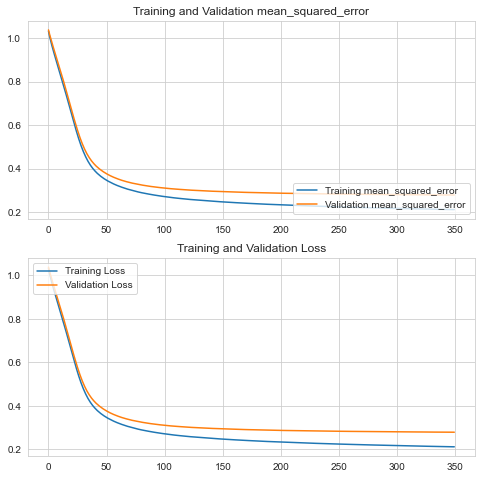

In [103]:
def plot_learning_curves():
    mean_squared_error = history3.history["mean_squared_error"]
    val_mean_squared_error = history3.history["val_mean_squared_error"]

    loss = history3.history['loss']
    val_loss = history3.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(range(350), mean_squared_error, label='Training mean_squared_error')
    plt.plot(range(350), val_mean_squared_error, label='Validation mean_squared_error')
    plt.legend(loc='lower right')
    plt.title('Training and Validation mean_squared_error')

    plt.subplot(2, 1, 2)
    plt.plot(range(350), loss, label='Training Loss')
    plt.plot(range(350), val_loss, label='Validation Loss')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Loss')
    plt.show()

plot_learning_curves()

# Model 3 Regularization

In [73]:
model3x = Sequential()

model3x.add(Dense(units = 82, activation = 'relu', input_dim = X.shape[1]))

model3x.add(Dense(units = 55, activation = 'relu'))

model3x.add(Dense(units = 28, activation = 'relu'))

model3x.add(Dense(units = 1, activation = 'linear'))

sgd = tf.optimizers.SGD(learning_rate=0.01,nesterov = True)
model3x.compile(optimizer =sgd, loss = 'mean_squared_error', metrics=['MeanSquaredError'])

history3x = model3x.fit(X_train, y_train,validation_data=(X_test,y_test) , batch_size = 128, epochs = 350,verbose=2)

Epoch 1/350
27/27 - 1s - loss: 0.8030 - mean_squared_error: 0.8030 - val_loss: 0.5983 - val_mean_squared_error: 0.5983 - 552ms/epoch - 20ms/step
Epoch 2/350
27/27 - 0s - loss: 0.4609 - mean_squared_error: 0.4609 - val_loss: 0.4489 - val_mean_squared_error: 0.4489 - 61ms/epoch - 2ms/step
Epoch 3/350
27/27 - 0s - loss: 0.3728 - mean_squared_error: 0.3728 - val_loss: 0.4060 - val_mean_squared_error: 0.4060 - 61ms/epoch - 2ms/step
Epoch 4/350
27/27 - 0s - loss: 0.3362 - mean_squared_error: 0.3362 - val_loss: 0.3793 - val_mean_squared_error: 0.3793 - 61ms/epoch - 2ms/step
Epoch 5/350
27/27 - 0s - loss: 0.3141 - mean_squared_error: 0.3141 - val_loss: 0.3655 - val_mean_squared_error: 0.3655 - 58ms/epoch - 2ms/step
Epoch 6/350
27/27 - 0s - loss: 0.2994 - mean_squared_error: 0.2994 - val_loss: 0.3508 - val_mean_squared_error: 0.3508 - 76ms/epoch - 3ms/step
Epoch 7/350
27/27 - 0s - loss: 0.2883 - mean_squared_error: 0.2883 - val_loss: 0.3426 - val_mean_squared_error: 0.3426 - 65ms/epoch - 2ms/st

In [74]:
model3x.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 82)                2296      
                                                                 
 dense_32 (Dense)            (None, 55)                4565      
                                                                 
 dense_33 (Dense)            (None, 28)                1568      
                                                                 
 dense_34 (Dense)            (None, 1)                 29        
                                                                 
Total params: 8,458
Trainable params: 8,458
Non-trainable params: 0
_________________________________________________________________


In [106]:
predictions=model3x.predict(X_test)
print('Explained_variance_score={}'.format( explained_variance_score(y_test,predictions)))
print('R-squared={}'.format( r2_score(y_test,predictions)))

MAE = mean_absolute_error(y_test,predictions)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

MSE = mean_squared_error(y_test,predictions)
print(f'Mean Squared Error (MSE): {np.round(MSE, 2)}')

46/46 [==============================] - 0s 957us/step
Explained_variance_score=0.6914658060166833
R-squared=0.6899605290874127
Mean Absolute Error (MAE): 0.38
Mean Squared Error (MSE): 0.32


In [107]:
history3x.history

{'loss': [0.803013265132904,
  0.46089521050453186,
  0.37278369069099426,
  0.3362375497817993,
  0.3140890300273895,
  0.2993585765361786,
  0.2882801294326782,
  0.2793661952018738,
  0.27291515469551086,
  0.2671194076538086,
  0.26280900835990906,
  0.2581098973751068,
  0.2556353807449341,
  0.2518187463283539,
  0.24860723316669464,
  0.24539117515087128,
  0.24331091344356537,
  0.24072033166885376,
  0.2385816127061844,
  0.23652203381061554,
  0.23490537703037262,
  0.23282288014888763,
  0.23120200634002686,
  0.2294185608625412,
  0.22780367732048035,
  0.2272372841835022,
  0.22440215945243835,
  0.2232876867055893,
  0.2222956418991089,
  0.221649169921875,
  0.21959082782268524,
  0.21884526312351227,
  0.21782013773918152,
  0.21601980924606323,
  0.21541006863117218,
  0.21412567794322968,
  0.21343228220939636,
  0.21206268668174744,
  0.2114780694246292,
  0.21021819114685059,
  0.2092028111219406,
  0.20897014439105988,
  0.20742113888263702,
  0.20667727291584015,


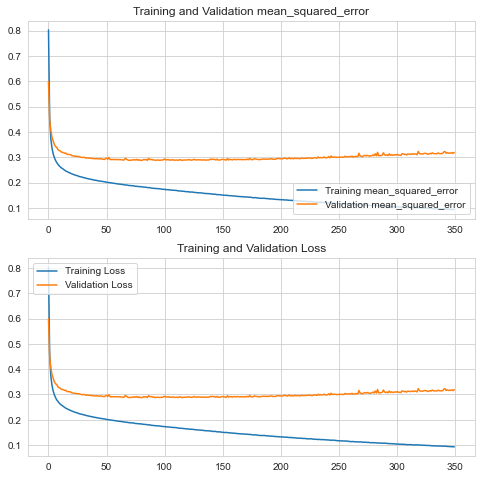

In [108]:
def plot_learning_curves():
    mean_squared_error = history3x.history["mean_squared_error"]
    val_mean_squared_error = history3x.history["val_mean_squared_error"]

    loss = history3x.history['loss']
    val_loss = history3x.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(range(350), mean_squared_error, label='Training mean_squared_error')
    plt.plot(range(350), val_mean_squared_error, label='Validation mean_squared_error')
    plt.legend(loc='lower right')
    plt.title('Training and Validation mean_squared_error')

    plt.subplot(2, 1, 2)
    plt.plot(range(350), loss, label='Training Loss')
    plt.plot(range(350), val_loss, label='Validation Loss')
    plt.legend(loc='upper left')
    plt.title('Training and Validation Loss')
    plt.show()

plot_learning_curves()